In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
""" How to read the 2D maps in the CAMELS multifield data set """

import numpy as np

# Provided are IllustrisTNG and SIMBA
# These are two different hydrodynamic simulation codes
# Others can be downloaded from the CAMELS website if necessary
#simcode = 'IllustrisTNG'

# We provide two fields, total matter (Mtot) and pressure (P)
# The pressure can be used as a proxy for the Sunyaev-Zel'dovich effect
# and at a qualitative level is more biased than total matter density.
#field = 'Mtot'

# The parameter values corresponding to the simulations
# Each array has 1,000 elements
# Omega_m and sigma_8 are the cosmological parameters (matter density and clustering amplitude)
# SN* are the supernova feedback parameters, AGN* the active galactic nuclei feedback parameters
# Note that the meaning of these parameters (and their effect)
#   differs between the different simulation codes.
# The simulations are arranged in a latin hypercube (LH), so the parameter values are quasi-random.
#Omega_m, sigma_8, SN1, AGN1, SN2, AGN2 = np.loadtxt(f'/content/drive/MyDrive/ai4phys/CAMELS_multifield/params_LH_IllustrisTNG.txt', unpack=True)


# The 2D images
# 1st dimension corresponds to parameter values,
# 2nd dimension are different maps for a given simulation,
# 3rd and 4th dimension are the image dimensions
imgs1 = np.load(f'/content/drive/MyDrive/ai4phys/CAMELS_multifield/Maps_Mtot_IllustrisTNG_LH_z=0.00.npy').reshape(1000, 15, 256, 256)

In [3]:
imgs2 = np.load(f'/content/drive/MyDrive/ai4phys/CAMELS_multifield/Maps_P_IllustrisTNG_LH_z=0.00.npy').reshape(1000, 15, 256, 256)

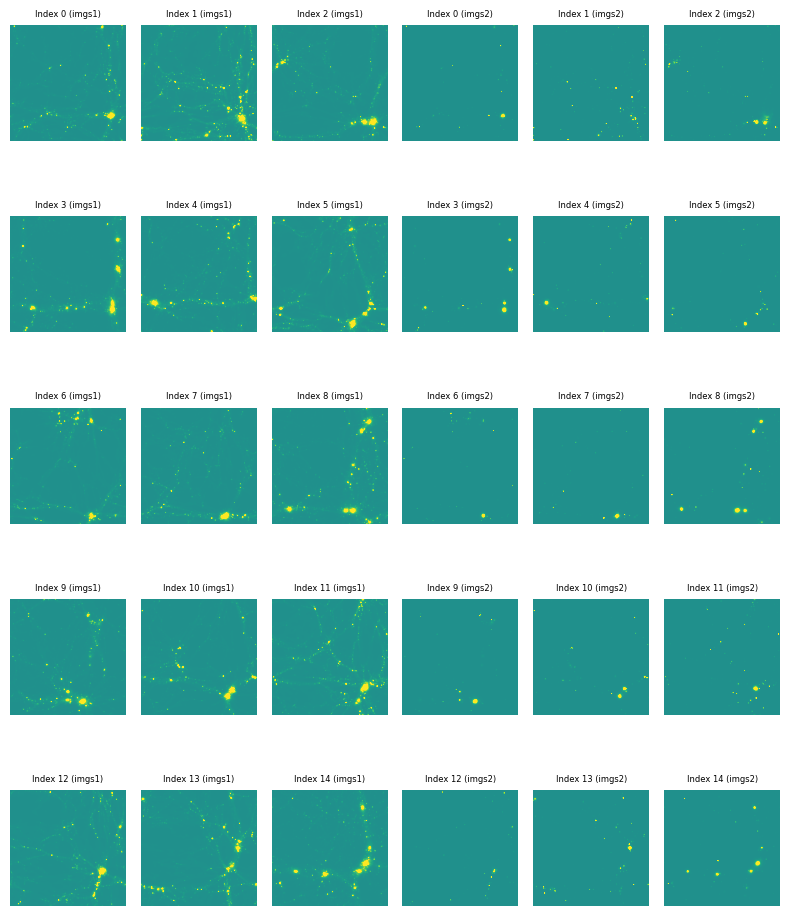

In [6]:
import matplotlib.pyplot as plt

def show_imgs_side_by_side(imgs1, imgs2, ind=4):
    # Create subplots with 5 rows and 6 columns (3 columns for each set of images)
    fig, axes = plt.subplots(5, 6, figsize=(8, 10))

    for i in range(15):
        istd1 = np.std(imgs1[ind, i, :, :])
        istd2 = np.std(imgs2[ind, i, :, :])

        # Determine the row and column for the current image in the subplot grid
        row = i // 3
        col1 = i % 3
        col2 = col1 + 3  # Shift the column index for the second set of images

        # Plot the image from imgs1
        ax1 = axes[row, col1]
        ax1.imshow(imgs1[ind, i, :, :], vmin=-3 * istd1, vmax=3 * istd1)
        ax1.set_title(f'Index {i} (imgs1)', fontsize = 6)
        ax1.axis('off')

        # Plot the image from imgs2
        ax2 = axes[row, col2]
        ax2.imshow(imgs2[ind, i, :, :], vmin=-3 * istd2, vmax=3 * istd2)
        ax2.set_title(f'Index {i} (imgs2)', fontsize = 6)
        ax2.axis('off')

    plt.tight_layout()
    plt.show()

show_imgs_side_by_side(imgs1, imgs2, ind=7)

In [9]:
images1 = imgs1[:, 4, :, :]
images2 = imgs2[:, 4, :, :]

In [10]:
import torch
from torch.utils.data import Dataset, DataLoader
# Assuming imgs1 and imgs2 are numpy arrays containing your images
# Make sure both arrays have the same length and correspond to each other.
class ImageToImageDataset(Dataset):
    def __init__(self, imgs1, imgs2, transform=None):
        self.imgs1 = imgs1
        self.imgs2 = imgs2
        self.transform = transform
    def __len__(self):
        return len(self.imgs1)
    def __getitem__(self, idx):
        image1 = self.imgs1[idx]
        image2 = self.imgs2[idx]
        if self.transform:
            # Apply any necessary transformations to the images here
            image1 = self.transform(image1)
            image2 = self.transform(image2)
        return image1, image2
# Define any additional transformations you want to apply here
# For example, you can use torchvision.transforms to resize, normalize, etc.
# transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), ...])
# Create an instance of the custom dataset
dataset = ImageToImageDataset(images1, images2, transform=None)  # Pass ‘transform’ if needed
# Create a DataLoader for batch processing
batch_size = 32  # You can adjust this according to your needs
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
# You can iterate through the dataloader to get batches of data
for batch in dataloader:
    imgs1_batch, imgs2_batch = batch
    # Perform your training/inference operations here

In [11]:
from unet import UNet